### Toxic Comment Classification Challenge
- toxic 
- severe_toxic
- obscene
- threat
- insult
- identity_hate

[Reference above the labels](https://figshare.com/articles/Wikipedia_Talk_Labels_Toxicity/4563973)

In [7]:
test = pd.read_csv('data/test.csv')
test.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [8]:
test_labeled = pd.read_csv('data/test_labels.csv')
test_labeled.tail()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1
153163,ffffce3fb183ee80,-1,-1,-1,-1,-1,-1


In [2]:
train = pd.read_csv("data/train.csv")
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [12]:
for i in train.columns[2:]:
    print(i,'(',train[i].nunique(),')', '\n', train[i].value_counts())

toxic ( 2 ) 
 0    144277
1     15294
Name: toxic, dtype: int64
severe_toxic ( 2 ) 
 0    157976
1      1595
Name: severe_toxic, dtype: int64
obscene ( 2 ) 
 0    151122
1      8449
Name: obscene, dtype: int64
threat ( 2 ) 
 0    159093
1       478
Name: threat, dtype: int64
insult ( 2 ) 
 0    151694
1      7877
Name: insult, dtype: int64
identity_hate ( 2 ) 
 0    158166
1      1405
Name: identity_hate, dtype: int64


In [14]:
# 모든 label값이 0인 경우의 comment example
train.loc[159566,'comment_text']

'":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can\'t even give a consistent argument - is the opening only supposed to mention significant aspects, or the ""most significant"" ones?   \n\n"'

In [15]:
train[train.obscene == 1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0
65,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,1,0,1,0,1,0
105,00472b8e2d38d1ea,A pair of jew-hating weiner nazi schmucks.,1,0,1,0,1,1
176,006b94add72ed61c,I think that your a Fagget get a oife and burn...,1,0,1,1,1,1


### EDA
- add clean comments
- class imbalance check and visualization
- multi-tagging check and visualization
- correlation check

    ##### issue
        특수문자(*)는 제거하면 안될거 같다. \n만 제거

In [3]:
# add clean comments
train['multi_tagging'] = train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].aggregate(np.sum, axis=1)

In [4]:
train['clean_comment'] = np.array([1 if i == 0 else 0for i in train['multi_tagging']])

In [5]:
train = train[['id','comment_text','toxic','severe_toxic','obscene','threat','insult','identity_hate','clean_comment','multi_tagging']]

In [6]:
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_comment,multi_tagging
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,1,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,1,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,1,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,1,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0,1,0


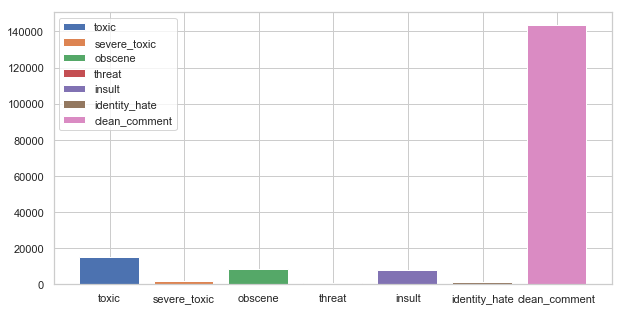

In [66]:
# class imbalance check
barwidth = 1
r1 = 0

plt.figure(figsize=(10,5))
for column in train.columns[2:9]:
    plt.bar(r1,train[column].value_counts()[1], label=column)
    plt.legend()
    r1 += barwidth 
plt.xticks([r + 0.01 for r in range(len(train.columns[2:9]))], train.columns[2:9])
plt.show()

clean_comment를 제외한다고 하더라도
class간 imbalance가 커보인다.

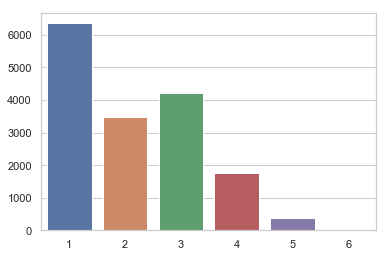

In [90]:
# multi-tagging check
sns.barplot(x=train.multi_tagging.value_counts().index[1:], y=train.multi_tagging.value_counts().values[1:],rasterized=True)

In [80]:
train.multi_tagging.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: multi_tagging, dtype: int64

In [94]:
# correlation check
train[train.columns[2:8]].corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


correlation으로는 하위항목여부를 알 수 없다.

##### 하위항목여부를 확인해보자

In [15]:
df = train.copy()
df = df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [26]:
# 하위항목을 확인해보자
# 함수화
def check_dependency(col):
    check = df[df[col] == 1]
    print("Check dependency when {} is 1".format(col))
    for i in check.columns:
        if i != col:
            print("selected column:" ,i)
            print(check[i].value_counts())

In [27]:
# 전체 컬럼 대상으로 돌려보자
for col in df.columns:
    check_dependency(col)
    print('\n')

Check dependency when toxic is 1
selected column: severe_toxic
0    13699
1     1595
Name: severe_toxic, dtype: int64
selected column: obscene
1    7926
0    7368
Name: obscene, dtype: int64
selected column: threat
0    14845
1      449
Name: threat, dtype: int64
selected column: insult
0    7950
1    7344
Name: insult, dtype: int64
selected column: identity_hate
0    13992
1     1302
Name: identity_hate, dtype: int64


Check dependency when severe_toxic is 1
selected column: toxic
1    1595
Name: toxic, dtype: int64
selected column: obscene
1    1517
0      78
Name: obscene, dtype: int64
selected column: threat
0    1483
1     112
Name: threat, dtype: int64
selected column: insult
1    1371
0     224
Name: insult, dtype: int64
selected column: identity_hate
0    1282
1     313
Name: identity_hate, dtype: int64


Check dependency when obscene is 1
selected column: toxic
1    7926
0     523
Name: toxic, dtype: int64
selected column: severe_toxic
0    6932
1    1517
Name: severe_toxic, d

- **단일 종속성**
    - severe_toxic = 1 --> toxic = 1 (check)

In [28]:
# 두개 이상에 종속된 경우를 확인해보자